<font size="5"><b><center>SOCIAL MEDIA SCRAPPING</center></b></font>
<font size="2"><b><center>ASSIGNMENT-3</center></b></font>

<font size="4"><b>REDDIT API</b></font>

Today, we're diving into the world of Reddit API. Reddit, often referred to as the "front page of the internet," is a vast platform where users can share news, stories, memes, and discussions across various communities known as subreddits.<N>

•	The Reddit API allows developers to programmatically access and interact with Reddit's vast repository of user-generated content.<N> 

•	With the Reddit API, developers can retrieve posts, comments, user information, subreddit data, and more, enabling them to build applications, conduct research, and analyze trends within the Reddit community.<N>

•	Whether it's creating a custom Reddit bot, monitoring discussions, or analyzing user engagement, the Reddit API offers a wealth of possibilities for those looking to explore and harness the rich data available on Reddit.

<font size="4"><b>SOCIAL MEDIA SCRAPPING ON RECESSION </b></font>

<font size="3"><b>RECESSION 2024 </b></font>

In 2024, the global economy faced significant challenges as it grappled with the effects of an ongoing recession. The recession, triggered by a combination of factors including geopolitical tensions, supply chain disruptions, and the lingering impact of the COVID-19 pandemic, resulted in widespread economic slowdowns and uncertainty across various industries and regions. Governments and central banks around the world implemented monetary and fiscal policies to mitigate the impact of the recession, including stimulus packages, interest rate adjustments, and financial assistance programs for businesses and individuals. Despite these efforts, the recession led to job losses, decreased consumer spending, and reduced business investment, exacerbating existing inequalities and disparities within societies. Amidst these challenges, there were also opportunities for innovation and adaptation as businesses sought to navigate the changing economic landscape. As the world continued to grapple with the recession in 2024, there was a renewed focus on resilience, sustainability, and collaboration to foster economic recovery and build a more resilient future.

<font size="3"><b>AUTHENTICATION</b></font>

In [1]:
# Install the PRAW library
!pip install praw
# Upgrade pip to the latest version
!pip install --upgrade pip
# Import the PRAW library
import praw
# Define a user agent for Reddit API access
user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
# Initialize a Reddit instance with your client ID, client secret, and user agent
reddit = praw.Reddit(
    client_id="Wh5cuCdnDE0TlrdwqRs1qA",
    client_secret="WXreR0UqYEA-lkRKSdpOUYsbeReo1Q",
    user_agent=user_agent
)

<font size="3"><b>GET TRENDING TOPIC FROM SUBREDDIT</b></font>

<font size="2">The <B>"Recession"</B> subreddit channel will be use for this project</font>

In [2]:
!pip install pandas
!pip install numpy
!pip install pyarrow

import pandas as pd
import numpy as np
import re #RegEx : Regular expression# Hot new rising topics

# Retrieving data from the "recession" subreddit
headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
    
# Print the number of unique headlines retrieved    
print(len(headlines))

A Stamford CT partially WFH employee would be paid 15% less
p2b06c
MikeMauls
1628680556.0
17
0.95
https://www.businessinsider.com/google-salary-calculator-work-from-home-pay-cut-technology-2021-8
0


<font size="3"><b>GET TOTAL COMMENT IN SUBREDDIT</b></font>

In [3]:
# Initialize an empty set to store unique submission titles
headlines = set()
# Iterate over each submission in the "recession" subreddit that is currently hot
for submission in reddit.subreddit("recession").hot(limit=None):
    # Add the title of each submission to the set of headlines
    headlines.add(submission.title)
# Print the total number of unique titles collected
print(len(headlines))

67


<font size="3"><b>CREATING A DATAFRAME</b></font>

In [4]:
#Create a dataframe from the scrapped data 
recession_df = pd.DataFrame(headlines)
recession_df.head()

,0
0,4th Stimulus Package| Will there be a fourth s...
1,Americans are hoarding cash as recession fears...
2,THE world's biggest economies may plunge into ...
3,"U.S. Payrolls Fall 701,000 in March Ahead of S..."
4,"Black employment rates are plummeting, and the..."


<font size="3"><b>DISPLAYING ROWS OF A DATAFRAME</b></font>

In [5]:
#df = df.iloc[:, 1:]
# Display the first few rows of the Recession DataFrame
recession_df.head()

,0
0,4th Stimulus Package| Will there be a fourth s...
1,Americans are hoarding cash as recession fears...
2,THE world's biggest economies may plunge into ...
3,"U.S. Payrolls Fall 701,000 in March Ahead of S..."
4,"Black employment rates are plummeting, and the..."


<font size="3"><b>DISPLAYING COLUMNS OF A DATAFRAME</b></font>

In [6]:
# Display the column names of the Recession DataFrame
recession_df.columns

RangeIndex(start=0, stop=1, step=1)

<font size="3"><b>RENAMING COLUMN OF A DATAFRAME</b></font>

In [7]:
# Renaming the column of the Bitcoin DataFrame to 'Titles' and displaying the first few rows
recession_df.columns = ['Titles']
recession_df.head()

,Titles
0,4th Stimulus Package| Will there be a fourth s...
1,Americans are hoarding cash as recession fears...
2,THE world's biggest economies may plunge into ...
3,"U.S. Payrolls Fall 701,000 in March Ahead of S..."
4,"Black employment rates are plummeting, and the..."


<font size="3"><b>CHECKING DUPLICATE TITLES OF A DATAFRAME</b></font>

In [8]:
# Checking for duplicate titles in the Bitcoin DataFrame and counting the occurrences
recession_df.Titles.duplicated().sum() 

0

<font size="3"><b>CLEANING THE TEXT</b></font>

In [10]:
#Clean the text
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
recession_df["Titles"]= recession_df["Titles"].apply(cleanTxt)

#Show the clean text
recession_df.head()

,Titles
0,4th Stimulus Package| Will there be a fourth s...
1,Americans are hoarding cash as recession fears...
2,THE world's biggest economies may plunge into ...
3,"U.S. Payrolls Fall 701,000 in March Ahead of S..."
4,"Black employment rates are plummeting, and the..."


<font size="3"><b>REMOVING EMOJI AND UNICODE</b></font>

In [11]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
recession_df["Titles"]= recession_df["Titles"].apply(remove_emoji)

#Show the clean text
recession_df.head()

,Titles
0,4th Stimulus Package| Will there be a fourth s...
1,Americans are hoarding cash as recession fears...
2,THE world's biggest economies may plunge into ...
3,"U.S. Payrolls Fall 701,000 in March Ahead of S..."
4,"Black employment rates are plummeting, and the..."


<font size="3"><b>SENTIMENT ANALYSIS OF RECESSION</b></font>

In [13]:
!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
recession_df['Subjectivity'] = recession_df['Titles'].apply(getSubjectivity)
recession_df['Polarity'] = recession_df['Titles'].apply(getPolarity)

#Now display data
recession_df.head()

,Titles,Subjectivity,Polarity
0,4th Stimulus Package| Will there be a fourth s...,0.000000,0.000000
1,Americans are hoarding cash as recession fears...,0.000000,0.000000
2,THE world's biggest economies may plunge into ...,0.000000,0.000000
3,"U.S. Payrolls Fall 701,000 in March Ahead of S...",0.000000,0.000000
4,"Black employment rates are plummeting, and the...",0.433333,-0.166667


<font size="3"><b>CATEGORIZING BITCOIN REDDIT POSTS</b></font>

In [14]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
recession_df["Insight"] = recession_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
recession_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,4th Stimulus Package| Will there be a fourth s...,0.000000,0.000000,Neutral
1,Americans are hoarding cash as recession fears...,0.000000,0.000000,Neutral
2,THE world's biggest economies may plunge into ...,0.000000,0.000000,Neutral
3,"U.S. Payrolls Fall 701,000 in March Ahead of S...",0.000000,0.000000,Neutral
4,"Black employment rates are plummeting, and the...",0.433333,-0.166667,Negative
5,Recession risk looms with 3rd state of emergency,0.000000,0.000000,Neutral
6,OECD warns that Unemployment will end the year...,0.625000,0.525000,Positive
7,Have we hit a recession?,0.000000,0.000000,Neutral
8,The $2 trillion relief bill is massive but it ...,1.000000,0.000000,Neutral
9,We're already in the recession,0.000000,0.000000,Neutral


<font size="3"><b>DATA VISUALIZATION<b></font>

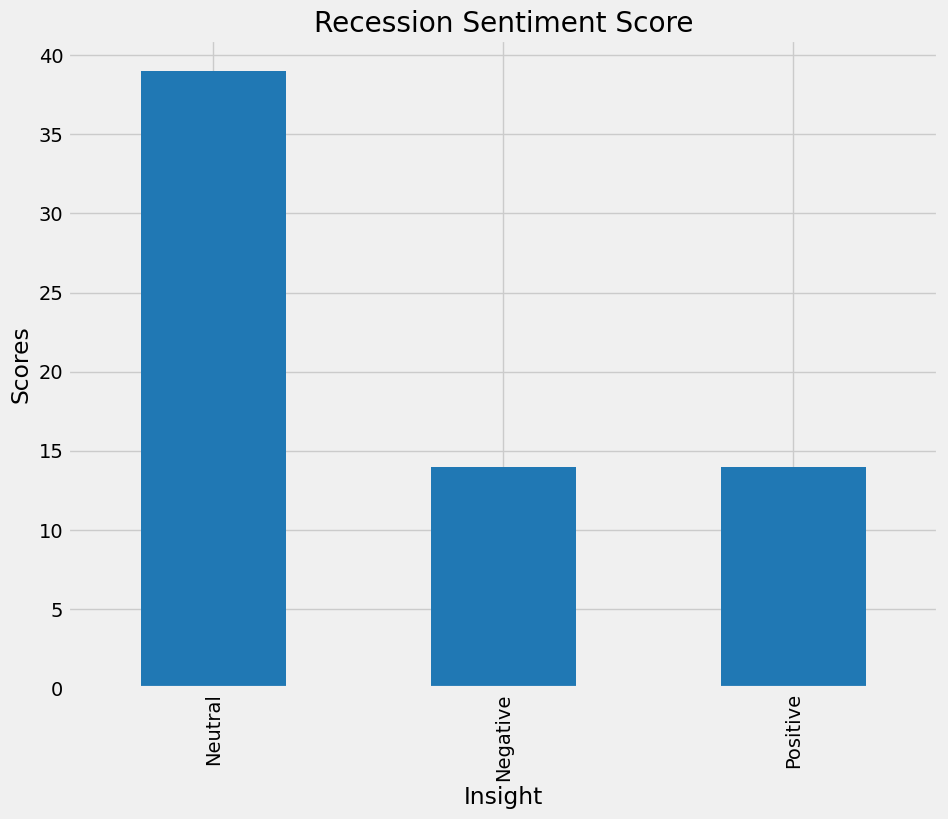

In [16]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Recession Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
recession_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

<font size="3"><b>WORD CLOUD<b></font>

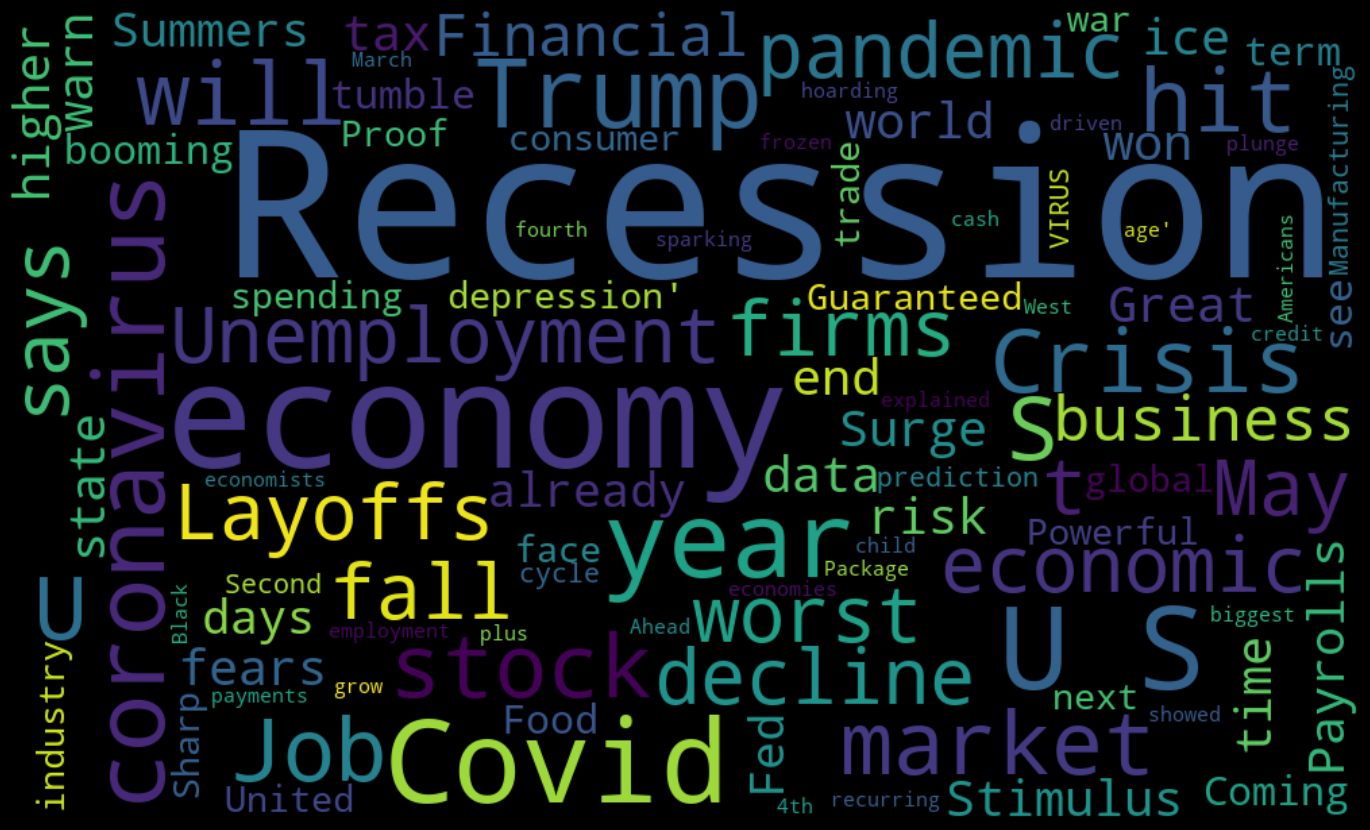

In [17]:
text = ' '.join( [twts for twts in recession_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");